In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Matplotlib is building the font cache; this may take a moment.


In [2]:
file_path = "experiment_results.txt"

In [3]:
# списки для данных из файла
experiments = []
data_structures = []
task_counts = []
times_elapsed = []

with open(file_path, "r") as f:
    for line in f:
        
        # пропуск пустых строк в файле
        if not line.strip():
            continue

        # парсим данные
        tokens = line.split(", ")
        experiment_type = tokens[0].split(": ")[1]
        data_structure = tokens[1].split(": ")[1]
        task_count = int(tokens[2].split(": ")[1])
        time_elapsed = float(tokens[3].split(": ")[1])

        # добавляем данные в списки
        experiments.append(experiment_type)
        data_structures.append(data_structure)
        task_counts.append(task_count)
        times_elapsed.append(time_elapsed)

In [4]:
# определяем, какие уникальные типы встретились в файле
data_structures_types = set(data_structures)
experiment_types = set(experiments)

# интересующие нас количества добавленных задач (в файле могут быть и другие)
task_count_types = [100, 1000, 10_000, 100_000]

In [10]:
# функция для построения результатов эксперимента
def plot_experiment_results(experiment_type, task_count):
    
    data_for_boxplot = {data_structure: [] for data_structure in data_structures}

    # заполняем данные для боксплота
    for i in range(len(data_structures)):
        if experiments[i] == experiment_type and task_counts[i] == task_count and data_structures[i] in data_structures_types:
            data_for_boxplot[data_structures[i]].append(times_elapsed[i])

    # построение боксплотов
    plt.figure(figsize=(10, 6))
    plt.boxplot(data_for_boxplot.values(), labels=data_for_boxplot.keys())
    plt.title(f"Время выполнения для {experiment_type} с {task_count} задачами")
    plt.xlabel("Структуры данных")
    plt.ylabel("Время выполнения (с)")
    plt.show()


    print(f"\nСтандартное отклонение и среднее.\n")
    for data_structure in data_structures_types:
        time_arr = data_for_boxplot[data_structure]
        print(f"np.mean: Среднее время: {np.mean(time_arr)}.")
        meow = np.std(time_arr) * 100
        if meow > 10:
            print(f"np.std: Cтандартное отклонение для {data_structure} больше 10%.\n")
        else: 
            print(f"np.std: Cтандартное отклонение для {data_structure}: {np.std(time_arr)}%.\n")

    # проверка нормальности распределения
    print(f"\nТесты на нормальность.\n")
    for data_structure in data_structures_types:
        time_arr = data_for_boxplot[data_structure]

        # тест шапиро
        stat, p_value = stats.shapiro(time_arr)
        if p_value <= 0.05:

            # если не нормально по шапиро, проверяем с помощью stats.normaltest
            stat, p_value = stats.normaltest(time_arr)
            if p_value <= 0.05:
                print(f"stats.normaltest: Распределение для {data_structure} НЕ НОРМАЛЬНО.")
            else:
                print(f"stats.normaltest: Распределение для {data_structure} нормально.")
        else:
            print(f"stats.shapiro: Распределение для {data_structure} нормально.")

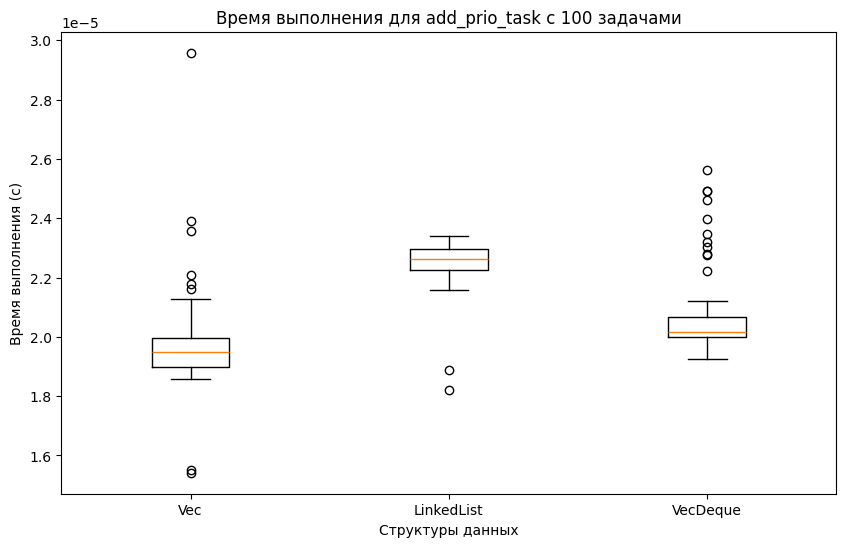


Стандартное отклонение и среднее.

np.mean: Среднее время: 2.245229268292683e-05.
np.std: Cтандартное отклонение для LinkedList: 9.853690467226702e-07%.

np.mean: Среднее время: 2.0875749999999997e-05.
np.std: Cтандартное отклонение для VecDeque: 1.6094284684919387e-06%.

np.mean: Среднее время: 1.9891625e-05.
np.std: Cтандартное отклонение для Vec: 2.2016561344531075e-06%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


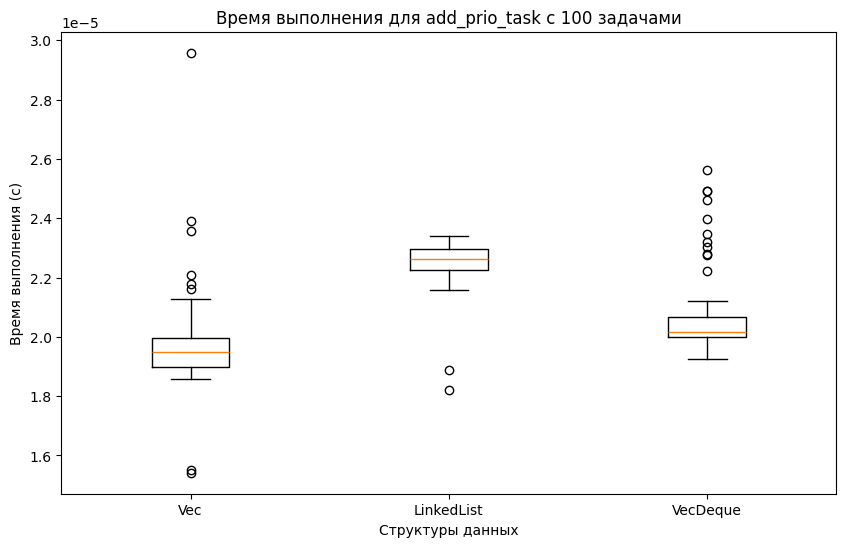


Стандартное отклонение и среднее.

np.mean: Среднее время: 2.245229268292683e-05.
np.std: Cтандартное отклонение для LinkedList: 9.853690467226702e-07%.

np.mean: Среднее время: 2.0875749999999997e-05.
np.std: Cтандартное отклонение для VecDeque: 1.6094284684919387e-06%.

np.mean: Среднее время: 1.9891625e-05.
np.std: Cтандартное отклонение для Vec: 2.2016561344531075e-06%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


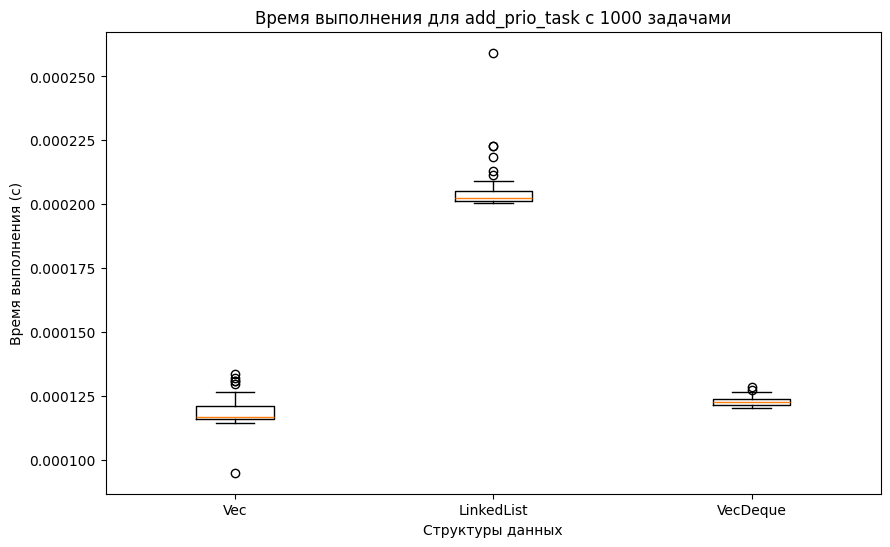


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.00020596346341463415.
np.std: Cтандартное отклонение для LinkedList: 1.0047992385564833e-05%.

np.mean: Среднее время: 0.00012279722222222221.
np.std: Cтандартное отклонение для VecDeque: 1.931475531399519e-06%.

np.mean: Среднее время: 0.00011888752500000002.
np.std: Cтандартное отклонение для Vec: 6.526217284872992e-06%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


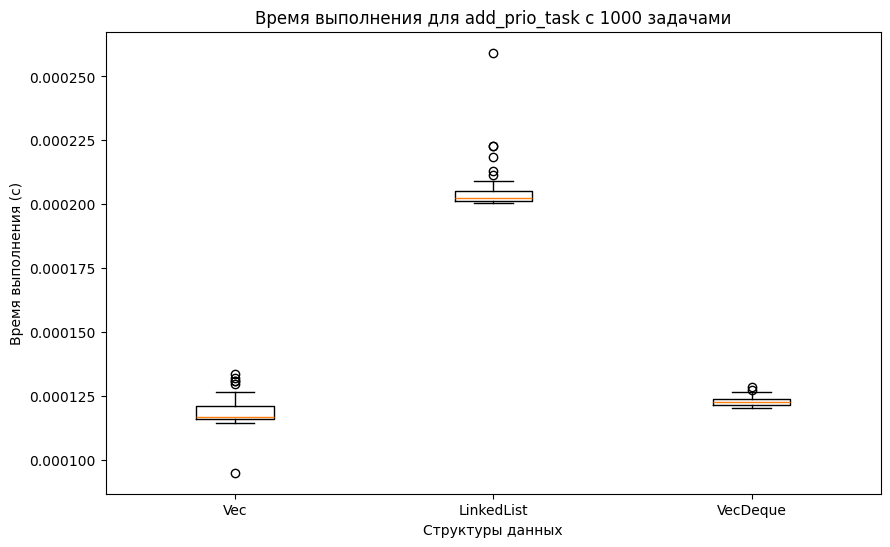


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.00020596346341463415.
np.std: Cтандартное отклонение для LinkedList: 1.0047992385564833e-05%.

np.mean: Среднее время: 0.00012279722222222221.
np.std: Cтандартное отклонение для VecDeque: 1.931475531399519e-06%.

np.mean: Среднее время: 0.00011888752500000002.
np.std: Cтандартное отклонение для Vec: 6.526217284872992e-06%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


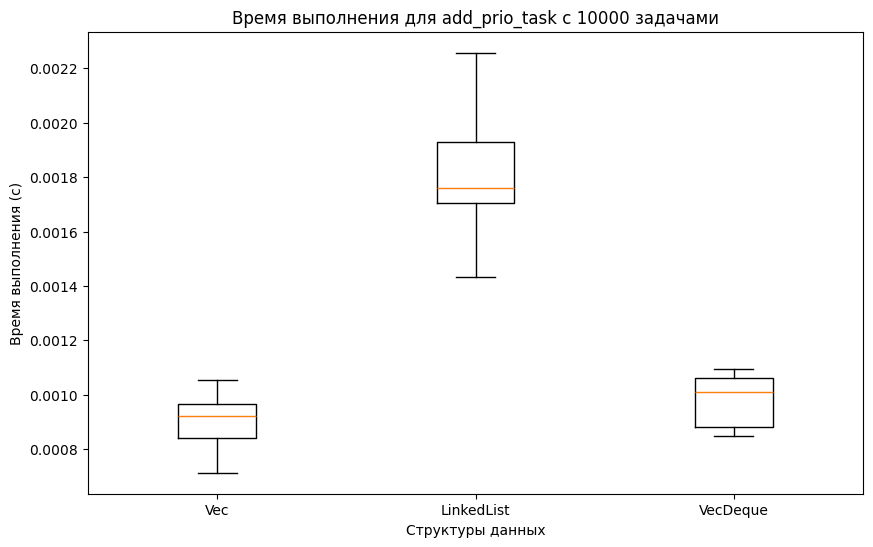


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.0018102236097560975.
np.std: Cтандартное отклонение для LinkedList: 0.00016082534605936963%.

np.mean: Среднее время: 0.0009830896500000001.
np.std: Cтандартное отклонение для VecDeque: 8.477022473267074e-05%.

np.mean: Среднее время: 0.0009097656500000001.
np.std: Cтандартное отклонение для Vec: 7.961660948305634e-05%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList нормально.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.shapiro: Распределение для Vec нормально.


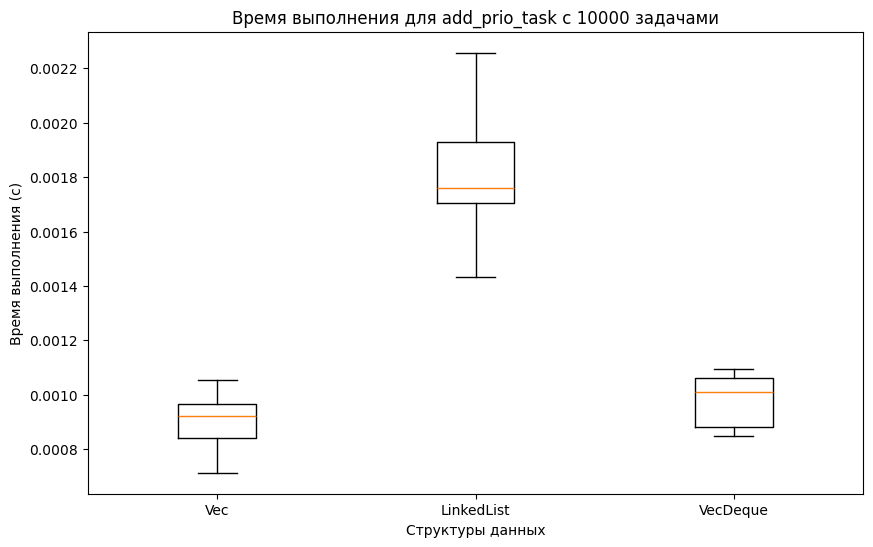


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.0018102236097560975.
np.std: Cтандартное отклонение для LinkedList: 0.00016082534605936963%.

np.mean: Среднее время: 0.0009830896500000001.
np.std: Cтандартное отклонение для VecDeque: 8.477022473267074e-05%.

np.mean: Среднее время: 0.0009097656500000001.
np.std: Cтандартное отклонение для Vec: 7.961660948305634e-05%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList нормально.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.shapiro: Распределение для Vec нормально.


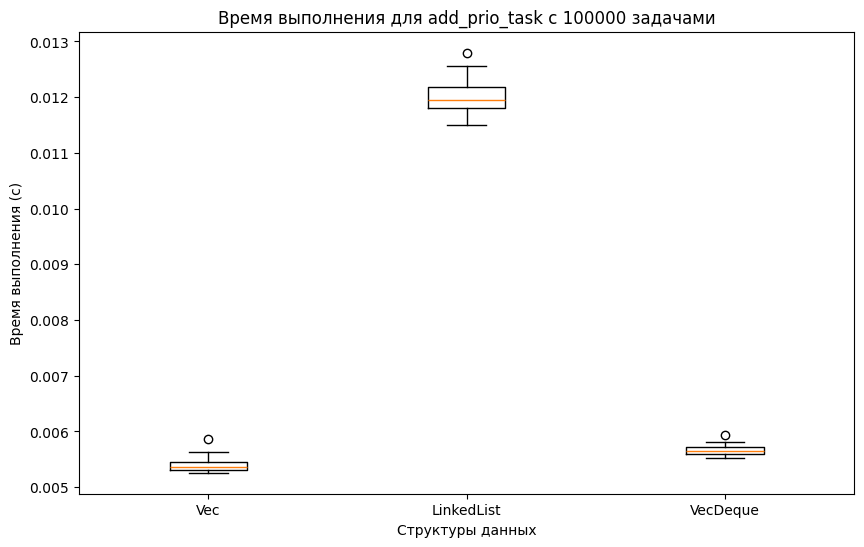


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.012003812416666667.
np.std: Cтандартное отклонение для LinkedList: 0.0003074556805518098%.

np.mean: Среднее время: 0.005660579923076923.
np.std: Cтандартное отклонение для VecDeque: 9.696103008977885e-05%.

np.mean: Среднее время: 0.005410017227272727.
np.std: Cтандартное отклонение для Vec: 0.00014803518680887753%.


Тесты на нормальность.

stats.shapiro: Распределение для LinkedList нормально.
stats.shapiro: Распределение для VecDeque нормально.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


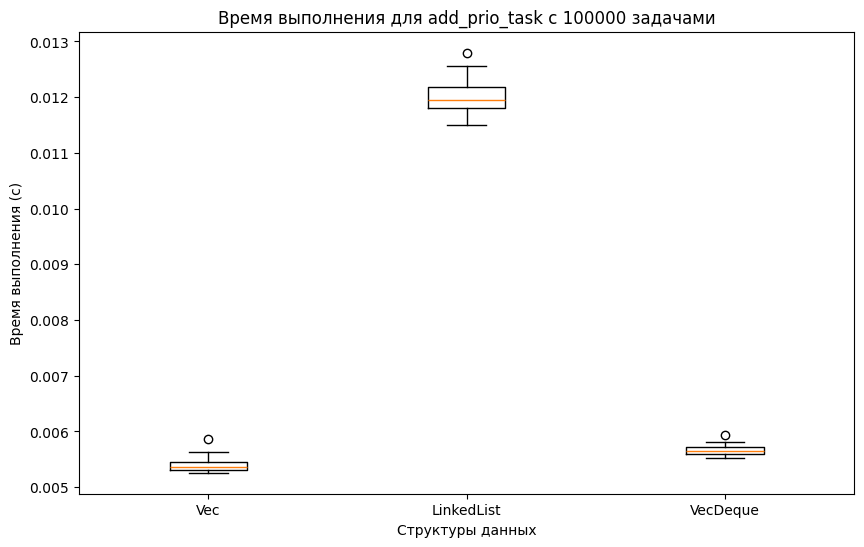


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.012003812416666667.
np.std: Cтандартное отклонение для LinkedList: 0.0003074556805518098%.

np.mean: Среднее время: 0.005660579923076923.
np.std: Cтандартное отклонение для VecDeque: 9.696103008977885e-05%.

np.mean: Среднее время: 0.005410017227272727.
np.std: Cтандартное отклонение для Vec: 0.00014803518680887753%.


Тесты на нормальность.

stats.shapiro: Распределение для LinkedList нормально.
stats.shapiro: Распределение для VecDeque нормально.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


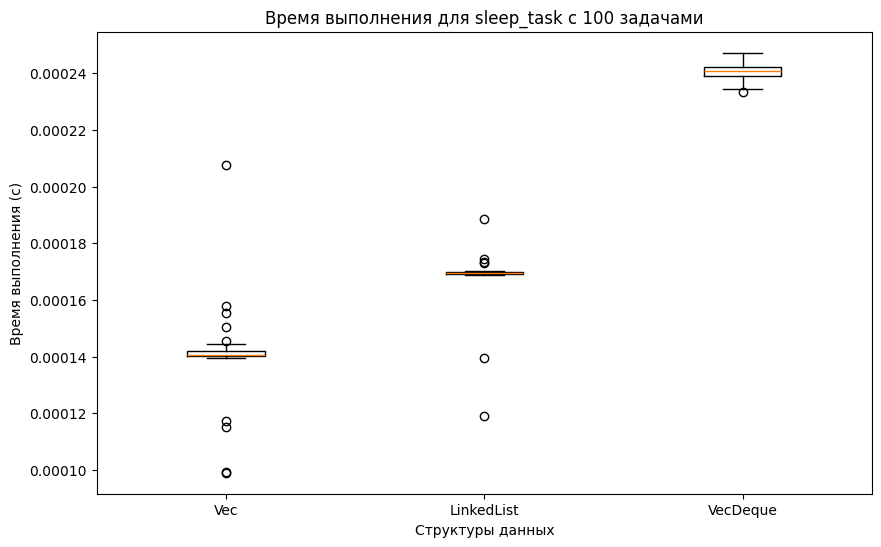


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.00016821700000000002.
np.std: Cтандартное отклонение для LinkedList: 9.392754179140826e-06%.

np.mean: Среднее время: 0.00024064073809523814.
np.std: Cтандартное отклонение для VecDeque: 2.599003142777593e-06%.

np.mean: Среднее время: 0.000140425.
np.std: Cтандартное отклонение для Vec: 1.5641352203374235e-05%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.shapiro: Распределение для VecDeque нормально.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


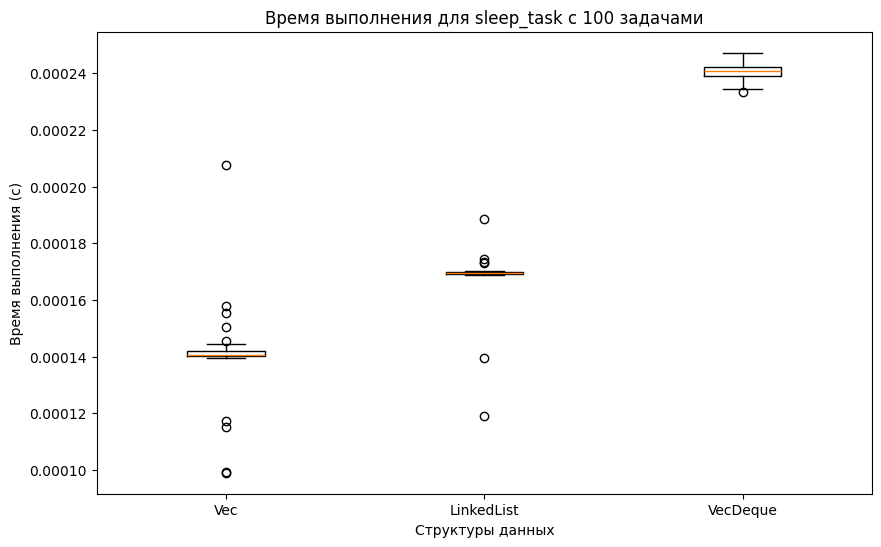


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.00016821700000000002.
np.std: Cтандартное отклонение для LinkedList: 9.392754179140826e-06%.

np.mean: Среднее время: 0.00024064073809523814.
np.std: Cтандартное отклонение для VecDeque: 2.599003142777593e-06%.

np.mean: Среднее время: 0.000140425.
np.std: Cтандартное отклонение для Vec: 1.5641352203374235e-05%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.shapiro: Распределение для VecDeque нормально.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


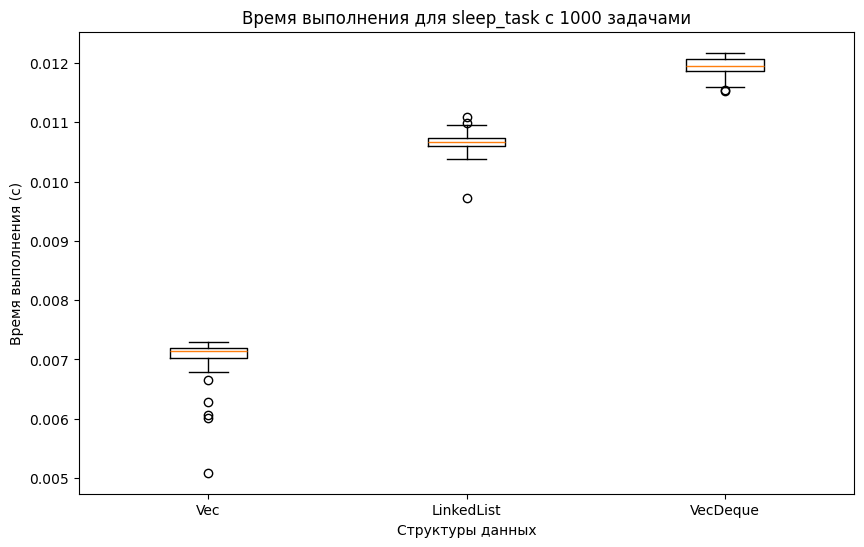


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.01066531838095238.
np.std: Cтандартное отклонение для LinkedList: 0.00020450802967003897%.

np.mean: Среднее время: 0.011950156444444443.
np.std: Cтандартное отклонение для VecDeque: 0.00015953837641277622%.

np.mean: Среднее время: 0.006995703219512194.
np.std: Cтандартное отклонение для Vec: 0.00042015782590364045%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


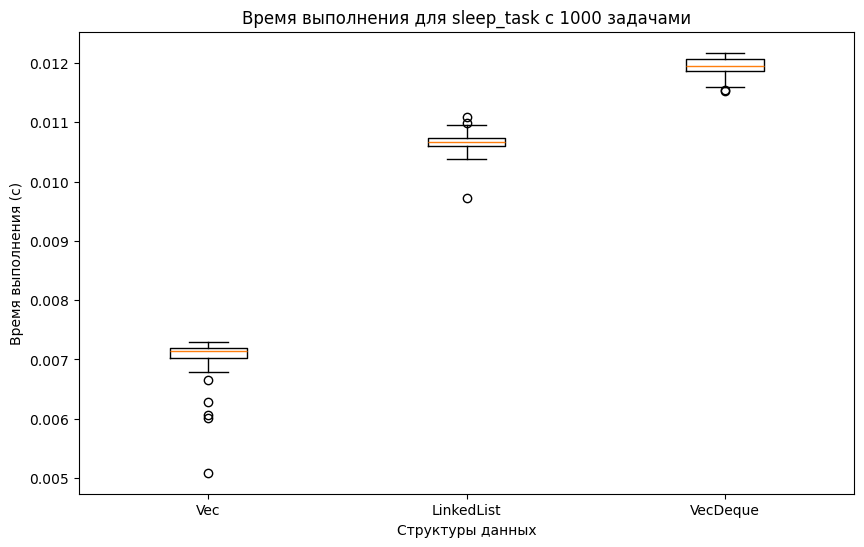


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.01066531838095238.
np.std: Cтандартное отклонение для LinkedList: 0.00020450802967003897%.

np.mean: Среднее время: 0.011950156444444443.
np.std: Cтандартное отклонение для VecDeque: 0.00015953837641277622%.

np.mean: Среднее время: 0.006995703219512194.
np.std: Cтандартное отклонение для Vec: 0.00042015782590364045%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


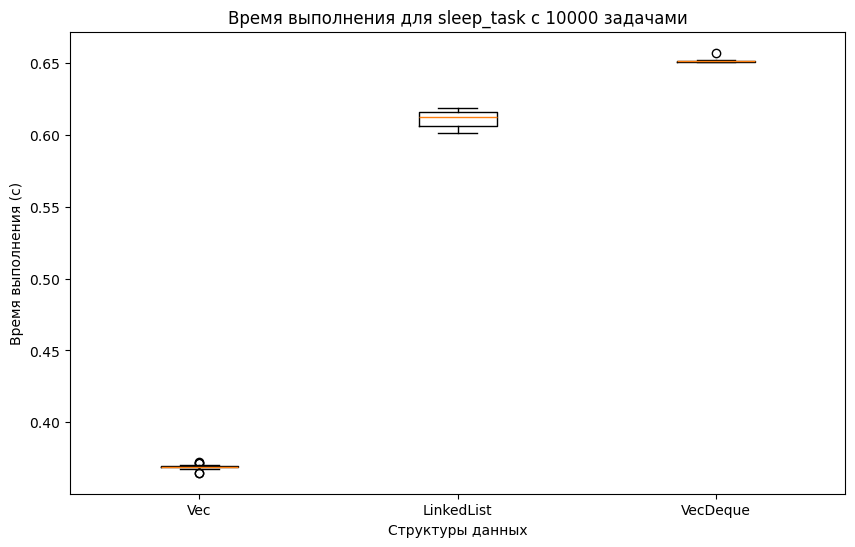


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.611881609804878.
np.std: Cтандартное отклонение для LinkedList: 0.004465498723948309%.

np.mean: Среднее время: 0.6515153892682928.
np.std: Cтандартное отклонение для VecDeque: 0.0010361131491623031%.

np.mean: Среднее время: 0.369170441097561.
np.std: Cтандартное отклонение для Vec: 0.0013679500671502144%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


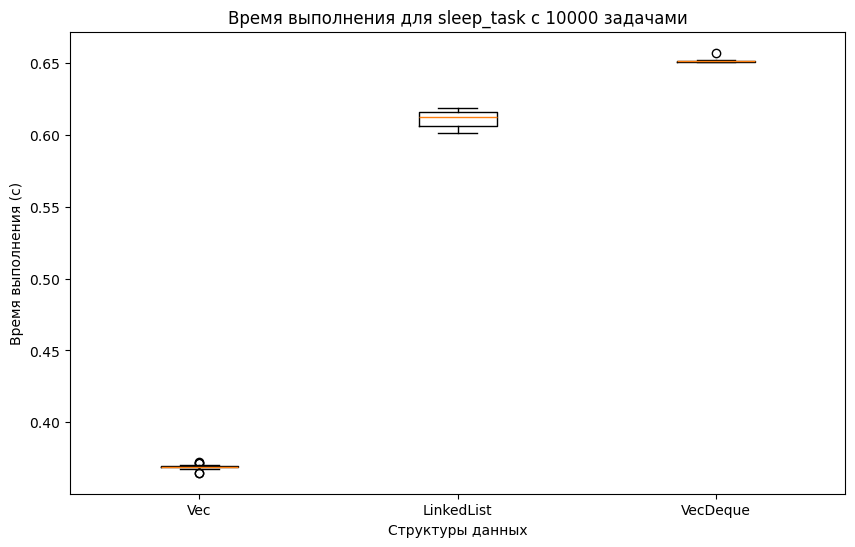


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.611881609804878.
np.std: Cтандартное отклонение для LinkedList: 0.004465498723948309%.

np.mean: Среднее время: 0.6515153892682928.
np.std: Cтандартное отклонение для VecDeque: 0.0010361131491623031%.

np.mean: Среднее время: 0.369170441097561.
np.std: Cтандартное отклонение для Vec: 0.0013679500671502144%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


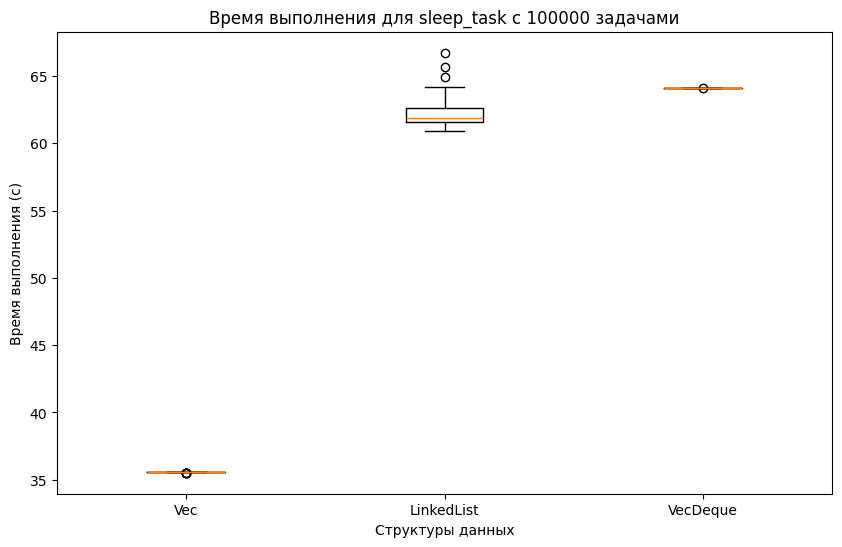


Стандартное отклонение и среднее.

np.mean: Среднее время: 62.362249729707315.
np.std: Cтандартное отклонение для LinkedList больше 10%.

np.mean: Среднее время: 64.10967425204763.
np.std: Cтандартное отклонение для VecDeque: 0.009619694876893927%.

np.mean: Среднее время: 35.57173861304762.
np.std: Cтандартное отклонение для Vec: 0.027327467140888805%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec нормально.


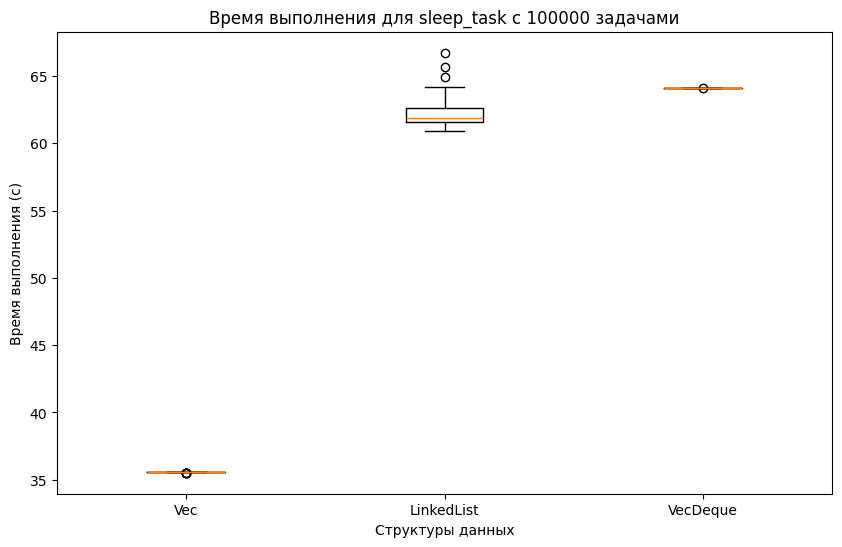


Стандартное отклонение и среднее.

np.mean: Среднее время: 62.362249729707315.
np.std: Cтандартное отклонение для LinkedList больше 10%.

np.mean: Среднее время: 64.10967425204763.
np.std: Cтандартное отклонение для VecDeque: 0.009619694876893927%.

np.mean: Среднее время: 35.57173861304762.
np.std: Cтандартное отклонение для Vec: 0.027327467140888805%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec нормально.


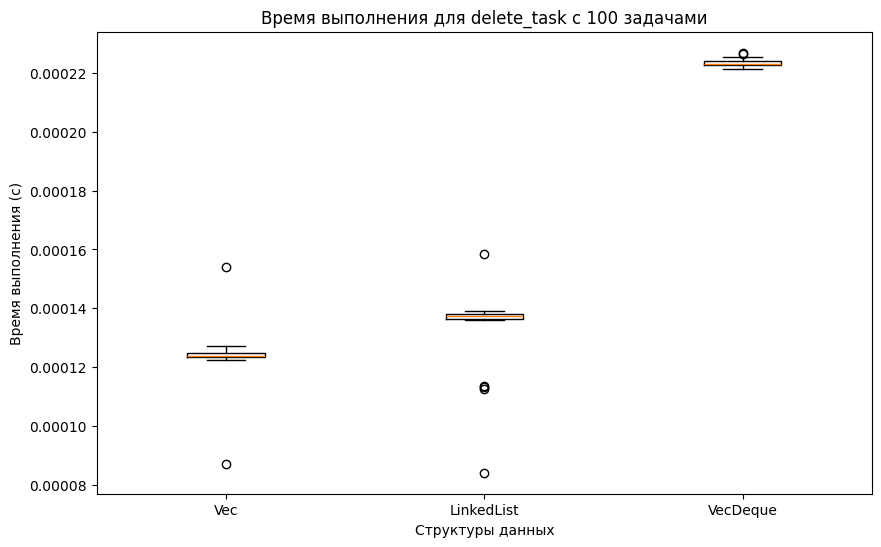


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.00013498341860465116.
np.std: Cтандартное отклонение для LinkedList: 1.0595999750306295e-05%.

np.mean: Среднее время: 0.0002233072558139535.
np.std: Cтандартное отклонение для VecDeque: 1.1381194626678722e-06%.

np.mean: Среднее время: 0.000123981275.
np.std: Cтандартное отклонение для Vec: 7.635749223185307e-06%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


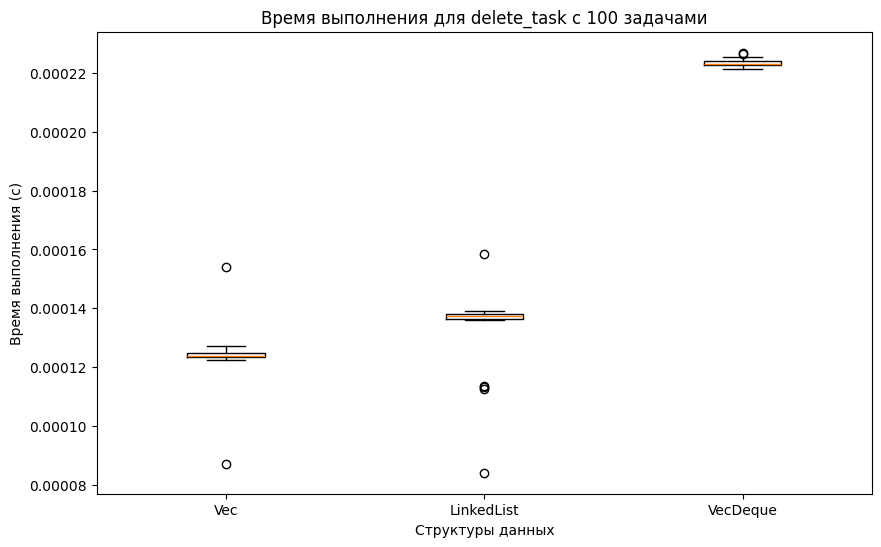


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.00013498341860465116.
np.std: Cтандартное отклонение для LinkedList: 1.0595999750306295e-05%.

np.mean: Среднее время: 0.0002233072558139535.
np.std: Cтандартное отклонение для VecDeque: 1.1381194626678722e-06%.

np.mean: Среднее время: 0.000123981275.
np.std: Cтандартное отклонение для Vec: 7.635749223185307e-06%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


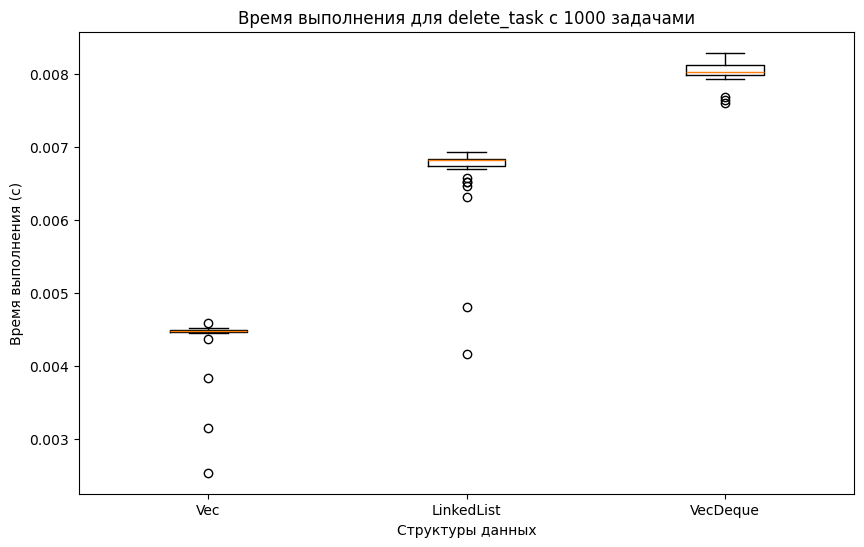


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.006673290704545453.
np.std: Cтандартное отклонение для LinkedList: 0.0004977602688178033%.

np.mean: Среднее время: 0.008032129024390244.
np.std: Cтандартное отклонение для VecDeque: 0.00014240465529069906%.

np.mean: Среднее время: 0.004385313574999999.
np.std: Cтандартное отклонение для Vec: 0.0003746072346059194%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


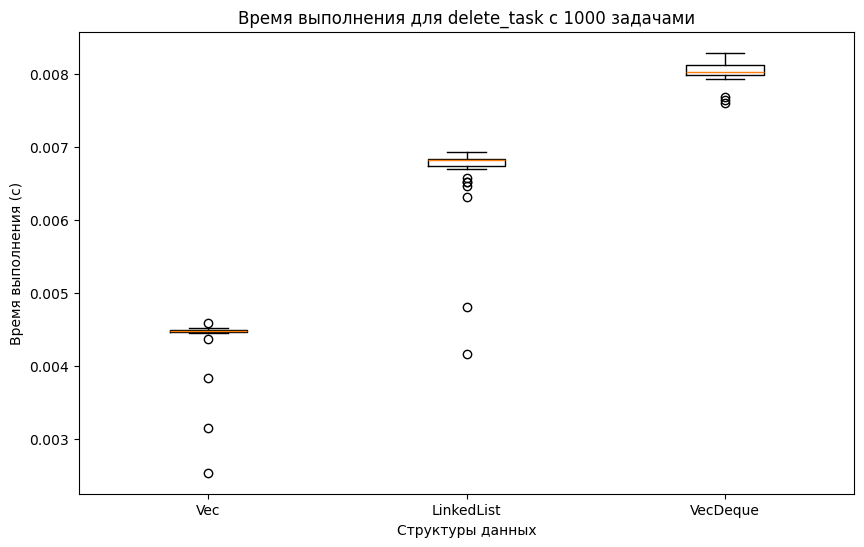


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.006673290704545453.
np.std: Cтандартное отклонение для LinkedList: 0.0004977602688178033%.

np.mean: Среднее время: 0.008032129024390244.
np.std: Cтандартное отклонение для VecDeque: 0.00014240465529069906%.

np.mean: Среднее время: 0.004385313574999999.
np.std: Cтандартное отклонение для Vec: 0.0003746072346059194%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


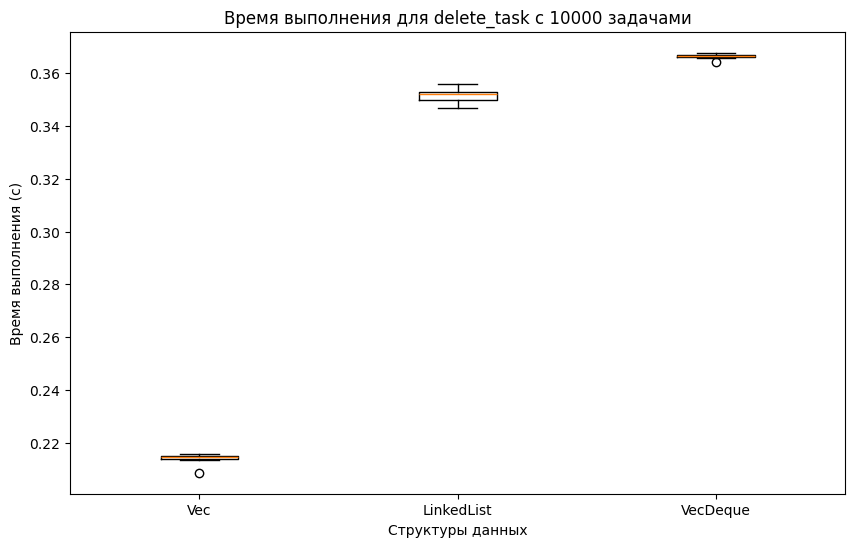


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.3516466686829268.
np.std: Cтандартное отклонение для LinkedList: 0.0021813588618531062%.

np.mean: Среднее время: 0.3666108525853658.
np.std: Cтандартное отклонение для VecDeque: 0.0005918897282715424%.

np.mean: Среднее время: 0.21426577600000002.
np.std: Cтандартное отклонение для Vec: 0.0011971799427494447%.


Тесты на нормальность.

stats.shapiro: Распределение для LinkedList нормально.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


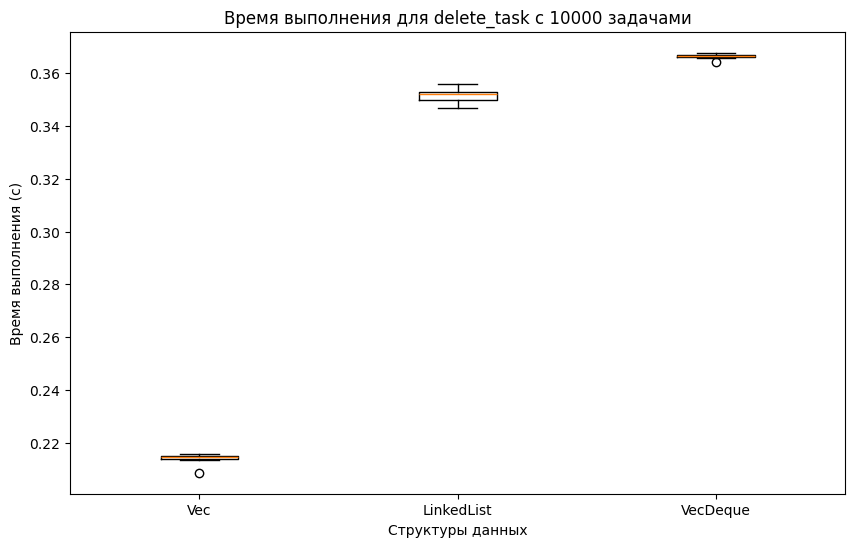


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.3516466686829268.
np.std: Cтандартное отклонение для LinkedList: 0.0021813588618531062%.

np.mean: Среднее время: 0.3666108525853658.
np.std: Cтандартное отклонение для VecDeque: 0.0005918897282715424%.

np.mean: Среднее время: 0.21426577600000002.
np.std: Cтандартное отклонение для Vec: 0.0011971799427494447%.


Тесты на нормальность.

stats.shapiro: Распределение для LinkedList нормально.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


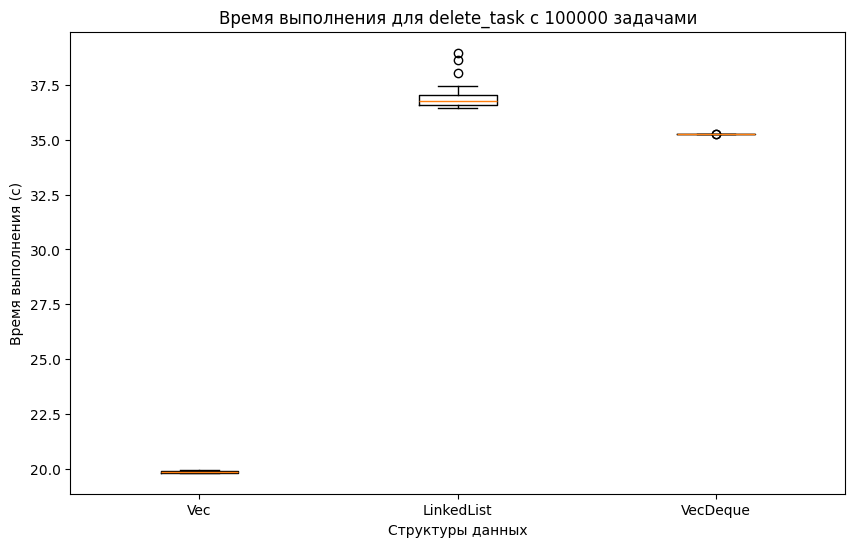


Стандартное отклонение и среднее.

np.mean: Среднее время: 37.017498474142855.
np.std: Cтандартное отклонение для LinkedList больше 10%.

np.mean: Среднее время: 35.252534768000004.
np.std: Cтандартное отклонение для VecDeque: 0.004778815346932835%.

np.mean: Среднее время: 19.862793100975.
np.std: Cтандартное отклонение для Vec: 0.03549757083324196%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.shapiro: Распределение для VecDeque нормально.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


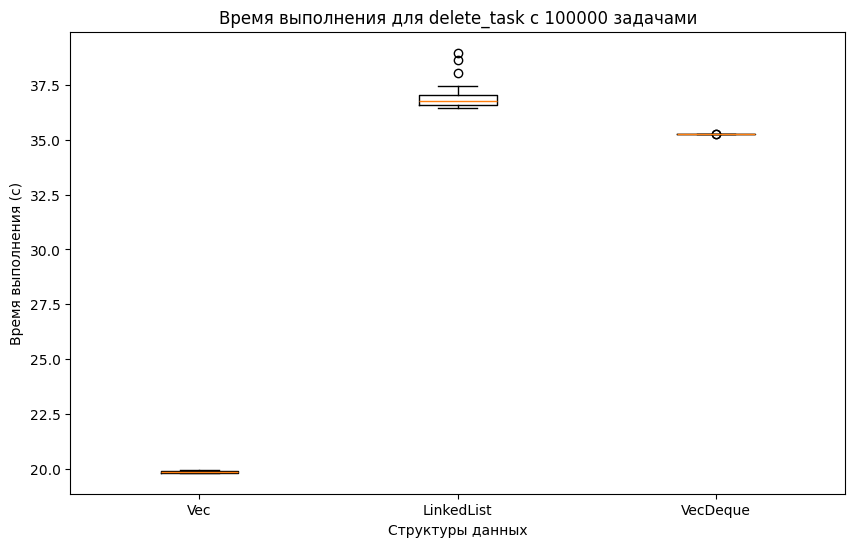


Стандартное отклонение и среднее.

np.mean: Среднее время: 37.017498474142855.
np.std: Cтандартное отклонение для LinkedList больше 10%.

np.mean: Среднее время: 35.252534768000004.
np.std: Cтандартное отклонение для VecDeque: 0.004778815346932835%.

np.mean: Среднее время: 19.862793100975.
np.std: Cтандартное отклонение для Vec: 0.03549757083324196%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.shapiro: Распределение для VecDeque нормально.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


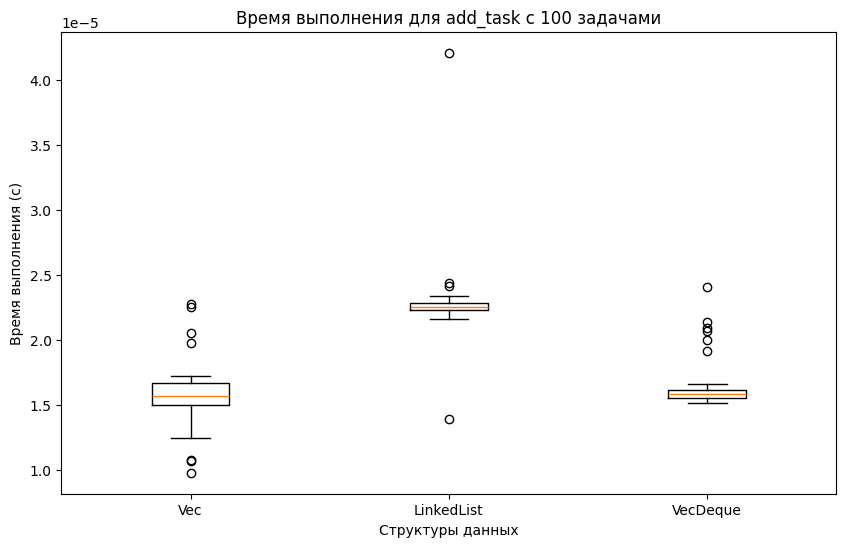


Стандартное отклонение и среднее.

np.mean: Среднее время: 2.289329268292683e-05.
np.std: Cтандартное отклонение для LinkedList: 3.353762024833418e-06%.

np.mean: Среднее время: 1.6499999999999998e-05.
np.std: Cтандартное отклонение для VecDeque: 1.9384355595697913e-06%.

np.mean: Среднее время: 1.5784325000000002e-05.
np.std: Cтандартное отклонение для Vec: 2.5425620187863656e-06%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


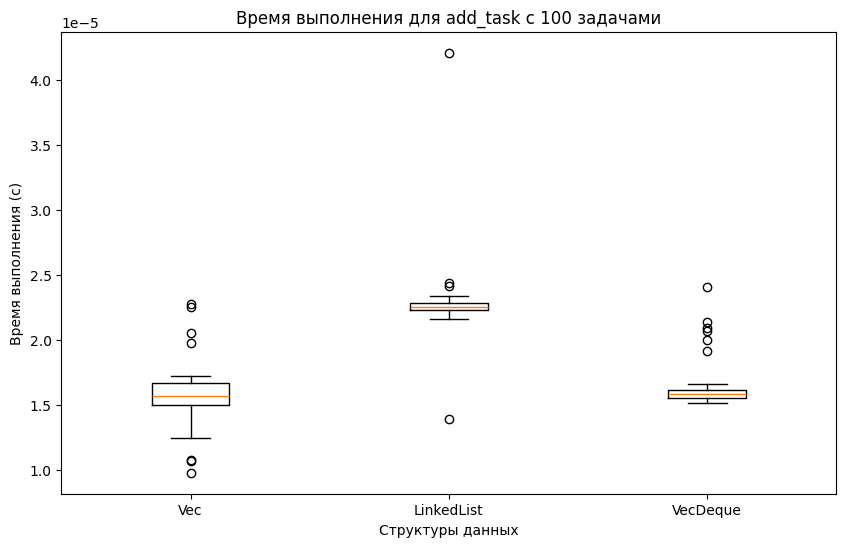


Стандартное отклонение и среднее.

np.mean: Среднее время: 2.289329268292683e-05.
np.std: Cтандартное отклонение для LinkedList: 3.353762024833418e-06%.

np.mean: Среднее время: 1.6499999999999998e-05.
np.std: Cтандартное отклонение для VecDeque: 1.9384355595697913e-06%.

np.mean: Среднее время: 1.5784325000000002e-05.
np.std: Cтандартное отклонение для Vec: 2.5425620187863656e-06%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


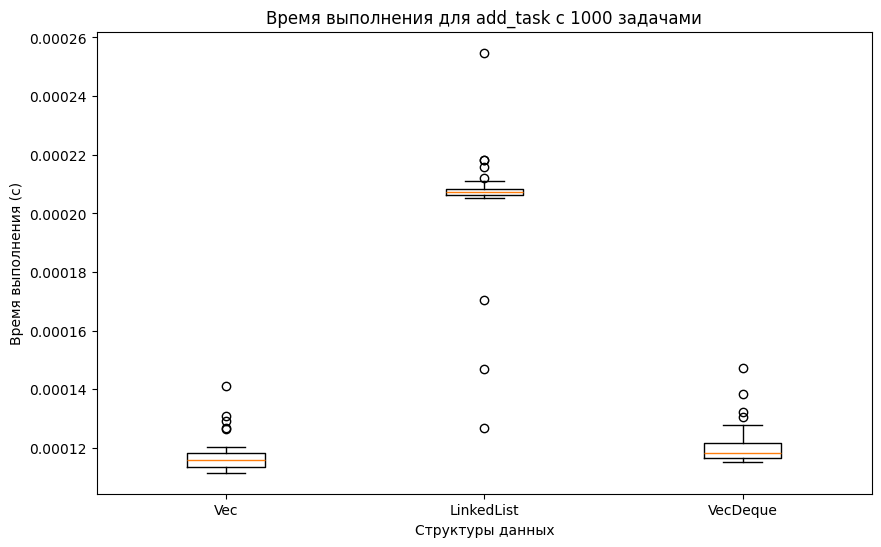


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.00020504952380952379.
np.std: Cтандартное отклонение для LinkedList: 1.821888279758916e-05%.

np.mean: Среднее время: 0.00012055820833333333.
np.std: Cтандартное отклонение для VecDeque: 6.306614090772523e-06%.

np.mean: Среднее время: 0.00011741362499999999.
np.std: Cтандартное отклонение для Vec: 5.90352351434082e-06%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


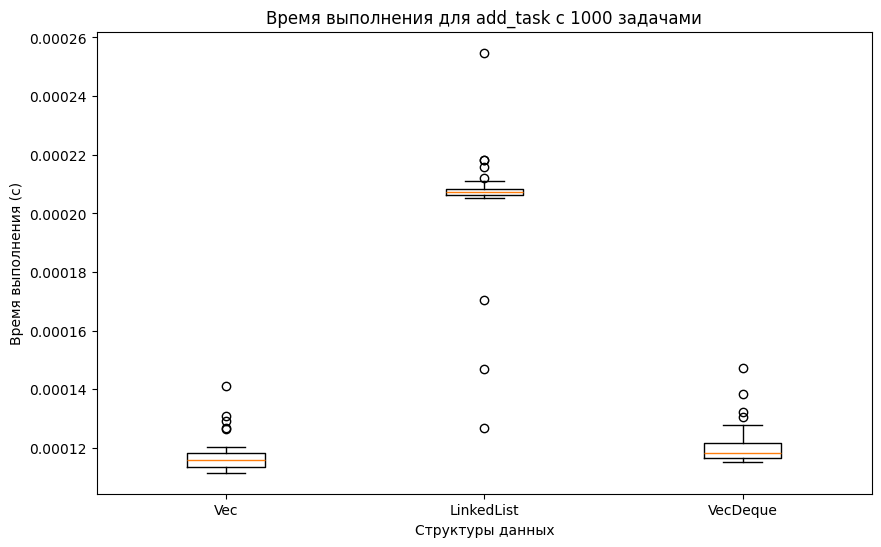


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.00020504952380952379.
np.std: Cтандартное отклонение для LinkedList: 1.821888279758916e-05%.

np.mean: Среднее время: 0.00012055820833333333.
np.std: Cтандартное отклонение для VecDeque: 6.306614090772523e-06%.

np.mean: Среднее время: 0.00011741362499999999.
np.std: Cтандартное отклонение для Vec: 5.90352351434082e-06%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


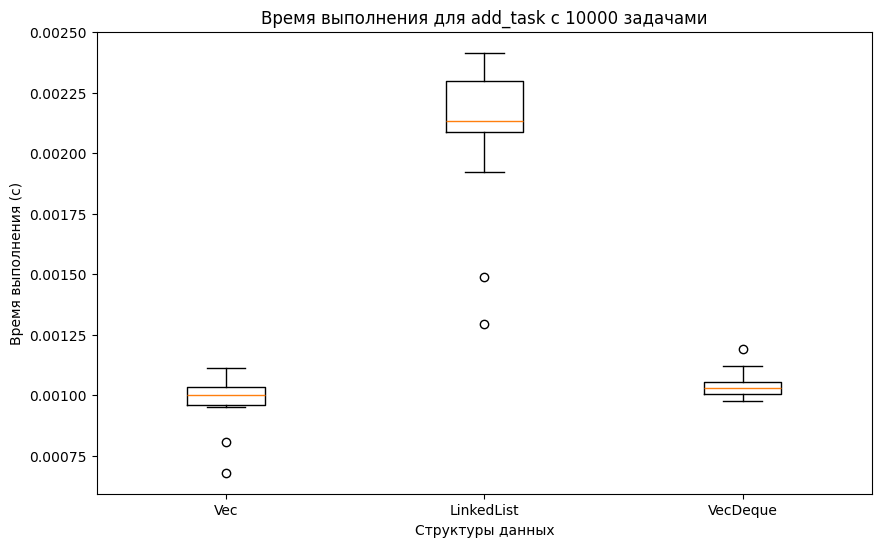


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.002162308523809524.
np.std: Cтандартное отклонение для LinkedList: 0.0002135955337882725%.

np.mean: Среднее время: 0.0010335585909090907.
np.std: Cтандартное отклонение для VecDeque: 4.0814929746867575e-05%.

np.mean: Среднее время: 0.0009918280500000002.
np.std: Cтандартное отклонение для Vec: 7.025845389273452e-05%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


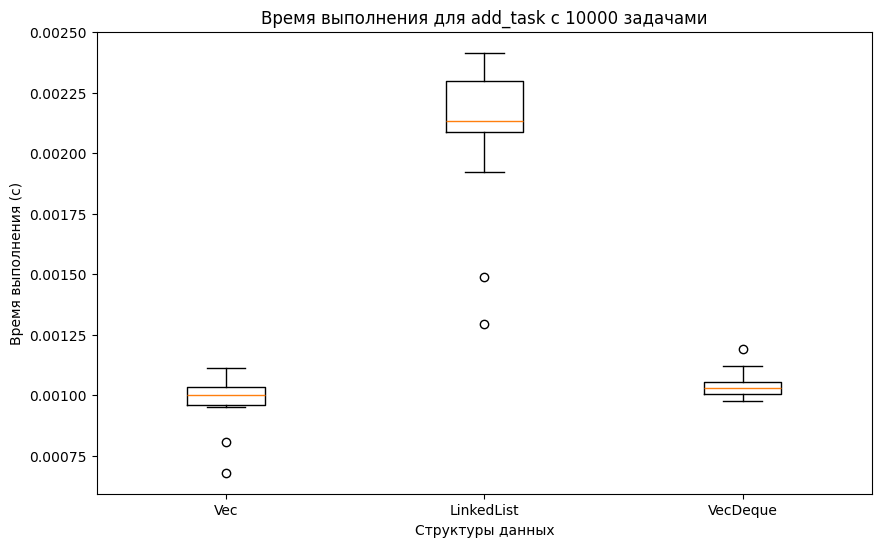


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.002162308523809524.
np.std: Cтандартное отклонение для LinkedList: 0.0002135955337882725%.

np.mean: Среднее время: 0.0010335585909090907.
np.std: Cтандартное отклонение для VecDeque: 4.0814929746867575e-05%.

np.mean: Среднее время: 0.0009918280500000002.
np.std: Cтандартное отклонение для Vec: 7.025845389273452e-05%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


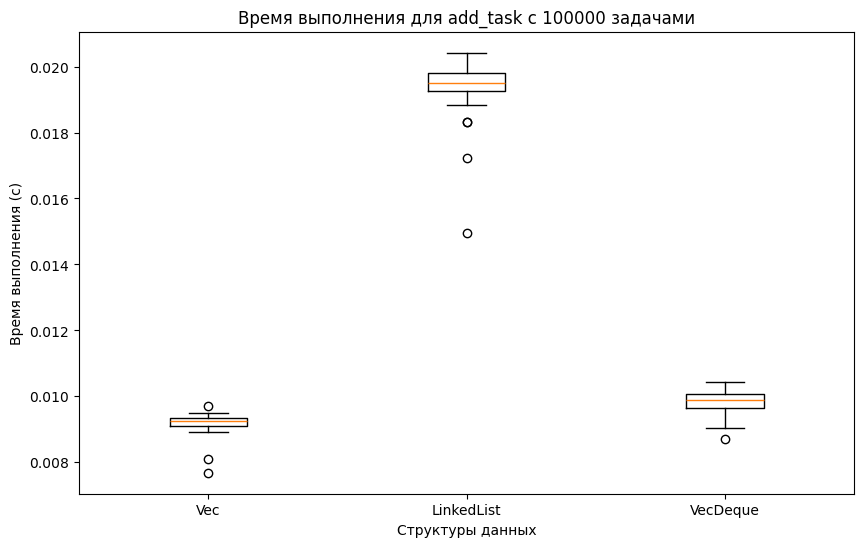


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.019280582.
np.std: Cтандартное отклонение для LinkedList: 0.0010104292190485848%.

np.mean: Среднее время: 0.009838583317073171.
np.std: Cтандартное отклонение для VecDeque: 0.00033104058500869573%.

np.mean: Среднее время: 0.009167763800000001.
np.std: Cтандартное отклонение для Vec: 0.0003842101183651466%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


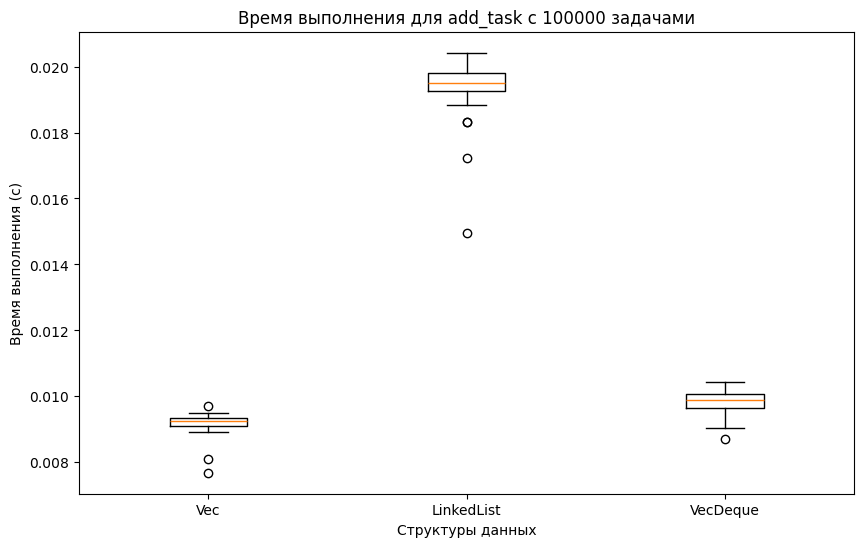


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.019280582.
np.std: Cтандартное отклонение для LinkedList: 0.0010104292190485848%.

np.mean: Среднее время: 0.009838583317073171.
np.std: Cтандартное отклонение для VecDeque: 0.00033104058500869573%.

np.mean: Среднее время: 0.009167763800000001.
np.std: Cтандартное отклонение для Vec: 0.0003842101183651466%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


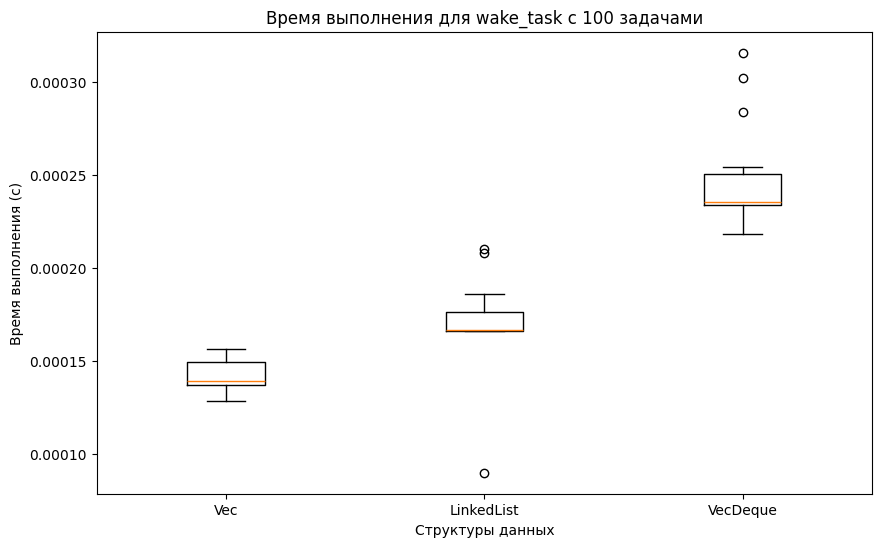


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.0001704469090909091.
np.std: Cтандартное отклонение для LinkedList: 1.5969289488404388e-05%.

np.mean: Среднее время: 0.0002437395681818182.
np.std: Cтандартное отклонение для VecDeque: 1.7733789962305562e-05%.

np.mean: Среднее время: 0.000142626025.
np.std: Cтандартное отклонение для Vec: 7.271781131495569e-06%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec нормально.


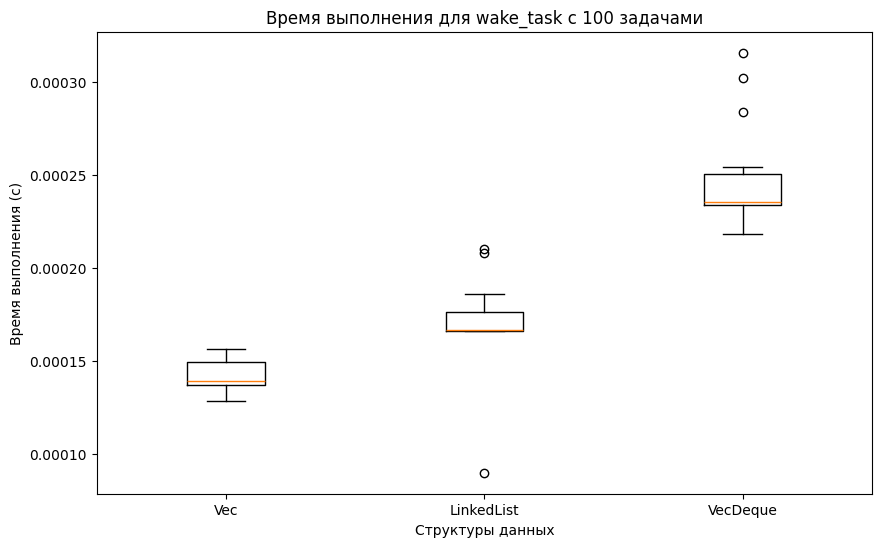


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.0001704469090909091.
np.std: Cтандартное отклонение для LinkedList: 1.5969289488404388e-05%.

np.mean: Среднее время: 0.0002437395681818182.
np.std: Cтандартное отклонение для VecDeque: 1.7733789962305562e-05%.

np.mean: Среднее время: 0.000142626025.
np.std: Cтандартное отклонение для Vec: 7.271781131495569e-06%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec нормально.


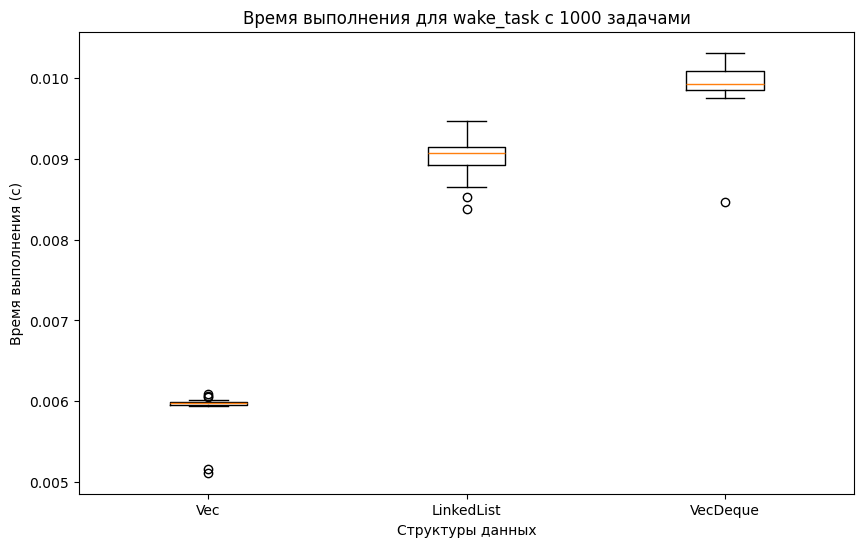


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.009030228723404254.
np.std: Cтандартное отклонение для LinkedList: 0.00021626783429819132%.

np.mean: Среднее время: 0.009947219709090908.
np.std: Cтандартное отклонение для VecDeque: 0.00024603112261505555%.

np.mean: Среднее время: 0.005941472222222221.
np.std: Cтандартное отклонение для Vec: 0.00017675875004308854%.


Тесты на нормальность.

stats.shapiro: Распределение для LinkedList нормально.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


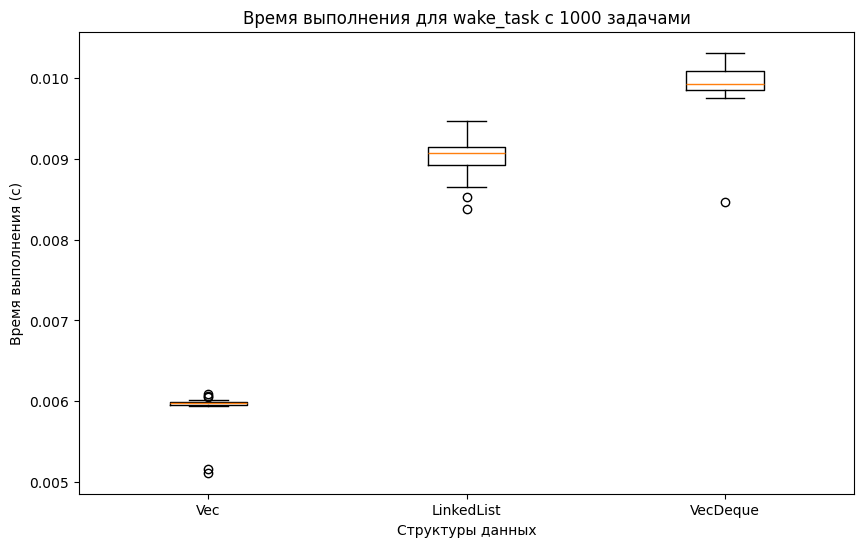


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.009030228723404254.
np.std: Cтандартное отклонение для LinkedList: 0.00021626783429819132%.

np.mean: Среднее время: 0.009947219709090908.
np.std: Cтандартное отклонение для VecDeque: 0.00024603112261505555%.

np.mean: Среднее время: 0.005941472222222221.
np.std: Cтандартное отклонение для Vec: 0.00017675875004308854%.


Тесты на нормальность.

stats.shapiro: Распределение для LinkedList нормально.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


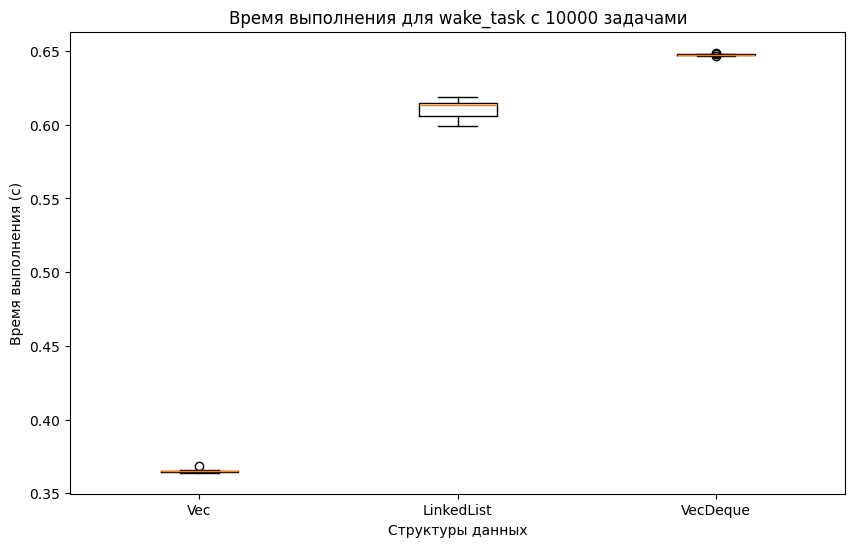


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.610552470825.
np.std: Cтандартное отклонение для LinkedList: 0.0054099095908045885%.

np.mean: Среднее время: 0.6474260327254902.
np.std: Cтандартное отклонение для VecDeque: 0.0004039927325654399%.

np.mean: Среднее время: 0.36490860297500005.
np.std: Cтандартное отклонение для Vec: 0.0007304183817322576%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


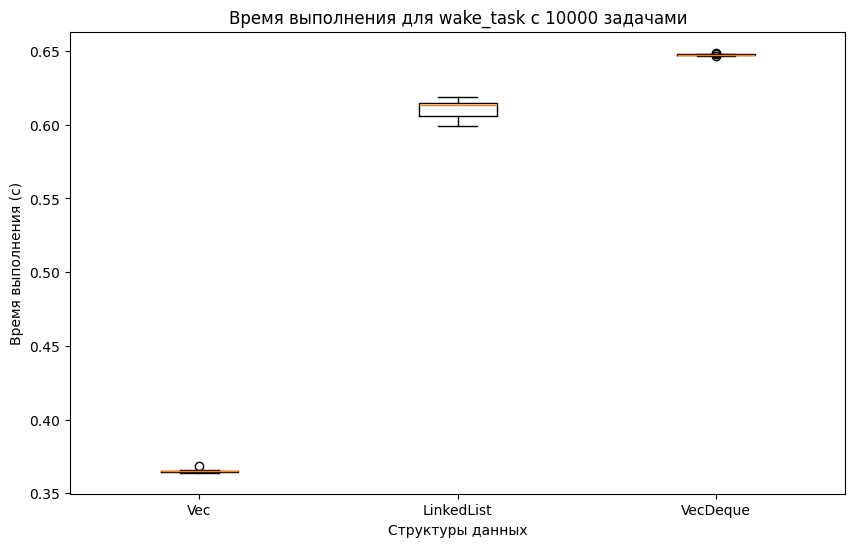


Стандартное отклонение и среднее.

np.mean: Среднее время: 0.610552470825.
np.std: Cтандартное отклонение для LinkedList: 0.0054099095908045885%.

np.mean: Среднее время: 0.6474260327254902.
np.std: Cтандартное отклонение для VecDeque: 0.0004039927325654399%.

np.mean: Среднее время: 0.36490860297500005.
np.std: Cтандартное отклонение для Vec: 0.0007304183817322576%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для VecDeque НЕ НОРМАЛЬНО.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


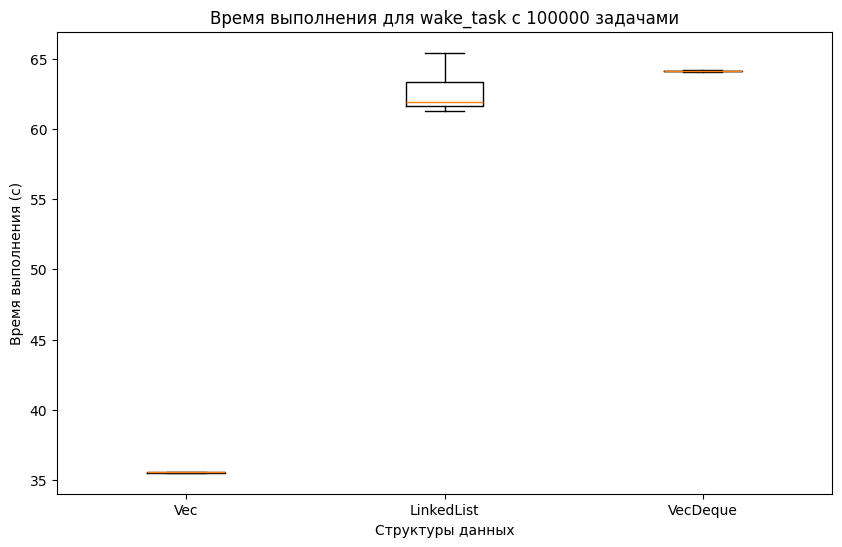


Стандартное отклонение и среднее.

np.mean: Среднее время: 62.471685484999995.
np.std: Cтандартное отклонение для LinkedList больше 10%.

np.mean: Среднее время: 64.12258934100001.
np.std: Cтандартное отклонение для VecDeque: 0.024564076617675495%.

np.mean: Среднее время: 35.55274252385714.
np.std: Cтандартное отклонение для Vec: 0.028083839545988216%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.shapiro: Распределение для VecDeque нормально.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


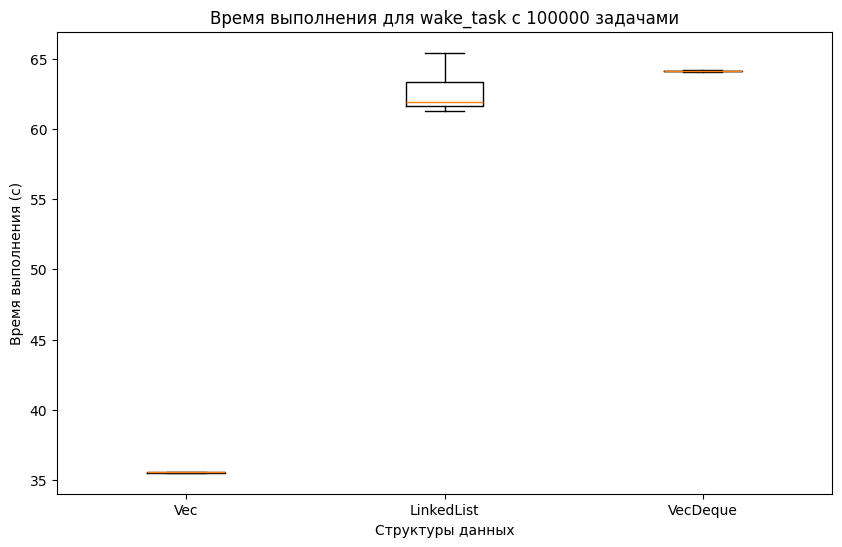


Стандартное отклонение и среднее.

np.mean: Среднее время: 62.471685484999995.
np.std: Cтандартное отклонение для LinkedList больше 10%.

np.mean: Среднее время: 64.12258934100001.
np.std: Cтандартное отклонение для VecDeque: 0.024564076617675495%.

np.mean: Среднее время: 35.55274252385714.
np.std: Cтандартное отклонение для Vec: 0.028083839545988216%.


Тесты на нормальность.

stats.normaltest: Распределение для LinkedList НЕ НОРМАЛЬНО.
stats.shapiro: Распределение для VecDeque нормально.
stats.normaltest: Распределение для Vec НЕ НОРМАЛЬНО.


In [11]:
for experiment_type in experiment_types:
    for task_count in task_count_types:
        fig = plot_experiment_results(experiment_type, task_count)
        plot_experiment_results(experiment_type, task_count)

In [12]:
# for experiment_type in experiment_types:
#     for task_count in task_count_types:
#         fig = plot_experiment_results(experiment_type, task_count)
#         filename = f"experiment_{experiment_type}_{task_count}.png"
#         fig.savefig(filename, dpi=300, bbox_inches='tight')
#         print(f"Сохранено: {filename}")
